In [18]:
import math
import matplotlib.pyplot as plt
import numpy as np
from pandas_datareader import data
import seaborn as sns


UsageError: Line magic function `%inline` not found.


In [39]:
nvda = data.DataReader('IBM', 'yahoo',start='1/1/2000')

In [40]:
time_elapsed = (nvda.index[-1] - nvda.index[0]).days

In [41]:
nvda[:2]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,116.0,111.875,112.4375,116.0000,10347700.0,74.620827
2000-01-04,114.5,110.875,114.0000,112.0625,8227800.0,72.087906


In [42]:
price_ratio = (nvda['Adj Close'][-1] / nvda['Adj Close'][1] )
inverse_num_years = 365.0 / time_elapsed 
cagr = price_ratio ** inverse_num_years - 1
print(cagr)

0.03144361558154252


In [43]:
vol = nvda['Adj Close'].pct_change().std()

In [44]:
trading_days = 252 
vol = vol * math.sqrt(trading_days)
vol

0.26444223301740577

In [45]:
print("cagr (mean returns) : ", str(round(cagr, 4)))
print("vol (standard deviation of return): ", str(round(vol,4)))

cagr (mean returns) :  0.0314
vol (standard deviation of return):  0.2644


In [46]:
daily_return_percent = np.random.normal(cagr/trading_days, vol / math.sqrt(trading_days), trading_days)+1

In [47]:
price_series = [nvda['Adj Close'][-1]]

for drp in daily_return_percent: 
    price_series.append(price_series[-1] * drp)

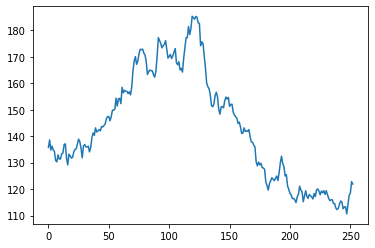

In [48]:
plt.plot(price_series)
plt.show()

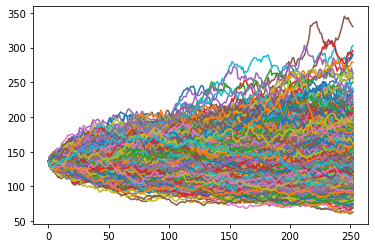

In [49]:
number_of_trials = 1000

for i in range(number_of_trials): 
    daily_return_percent = np.random.normal(cagr/trading_days, vol/math.sqrt(trading_days), trading_days) + 1 
    price_series = [nvda['Adj Close'][-1]]
    
    for drp in daily_return_percent:
        price_series.append(price_series[-1] * drp)
    
    plt.plot(price_series)
plt.show()
                                    

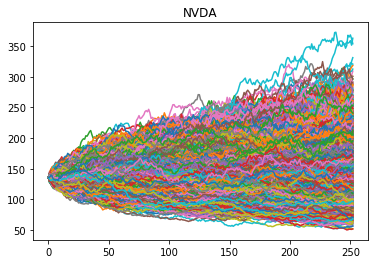

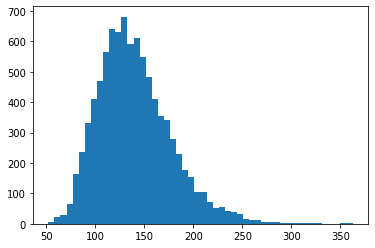

In [50]:
ending_price_points = [] 
larger_number_trials = 9001
for i in range(larger_number_trials):
    daily_return_percentages = np.random.normal(cagr/trading_days, vol / math.sqrt(trading_days), trading_days) + 1
    price_series = [nvda['Adj Close'][-1]]
    
    for drp in daily_return_percentages: 
        price_series.append(price_series[-1] * drp)
        
    plt.plot(price_series)
    
    ending_price_points.append(price_series[-1])
plt.title('NVDA')    
plt.show()

plt.hist(ending_price_points, bins = 50)
plt.show()

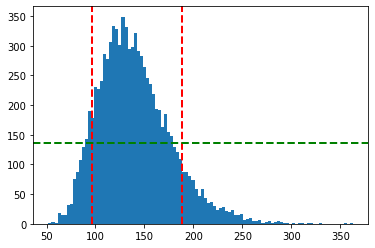

In [56]:
plt.hist(ending_price_points,bins=100)
plt.axvline(top_ten,color='r',linestyle='dashed',linewidth=2)
plt.axvline(bottom_ten,color='r',linestyle='dashed',linewidth=2)
plt.axhline(nvda['Adj Close'][-1],color='g', linestyle='dashed',linewidth=2)
plt.show()

In [52]:
expected_ending_price_point = round(np.mean(ending_price_points), 2)
print("Expected Ending Price Point: ", str(expected_ending_price_point))

Expected Ending Price Point:  140.03


In [53]:
population_mean = (cagr + 1) * nvda['Adj Close'][-1]
print("Sample Mean: ", str(expected_ending_price_point))
print("Population Mean: " , str(round(population_mean, 2)));
print("Percent Difference: ", str(round((population_mean - expected_ending_price_point) / population_mean * 100, 2)), "%")

Sample Mean:  140.03
Population Mean:  140.02
Percent Difference:  -0.01 %


In [54]:
top_ten = np.percentile(ending_price_points, 100-10)
bottom_ten = np.percentile(ending_price_points, 10);
print("Top 10% : ", str(round(top_ten, 2)))
print("Bottom 10%: ", str(round(bottom_ten, 2)))

Top 10% :  188.77
Bottom 10%:  96.34


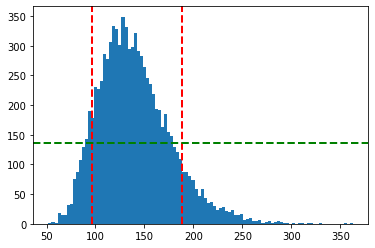

In [55]:
plt.hist(ending_price_points,bins=100)
plt.axvline(top_ten,color='r',linestyle='dashed',linewidth=2)
plt.axvline(bottom_ten,color='r',linestyle='dashed',linewidth=2)
plt.axhline(nvda['Adj Close'][-1],color='g', linestyle='dashed',linewidth=2)
plt.show()